# TP Images 852, corrigé

## Import des bibliothèques

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

## Un premier exemple

In [98]:
def miroir(fichier):
    """prend en entrée un fichier image et retourne l'image de l'image
     obtenue par une réflexion par rapport à l'axe vertical droit
    """
    im=Image.open(fichier)
    pixels = np.array(im)
    hauteur, largeur = pixels.shape[:2]
    pixels_res = np.zeros_like(pixels)
    for i in range(hauteur):
        for j in range(largeur):
            pixels_res[i, j,:] = pixels[i, largeur - 1 - j,:]
            #pixels_res[i, j] = pixels[i, largeur - 1 - j]
    img_res = Image.fromarray(pixels_res)
    img_res.save("miroir"+fichier)
    img_res.show()

In [100]:
%ls

10_Images_Correction.py                 mystere.png
852-correc-TPImages-2018-md.py          negatifgrisvalleluna.jpg
bleu_valleluna.jpg                      negatifvalleluna.jpg
bleuvalleluna.jpg                       output_26_1.png
contour_10_grisvalleluna.jpg            pixel_valleluna.jpg
contour_20_grisvalleluna.jpg            platane.jpg
contour_5_grisvalleluna.jpg             rouge_valleluna.jpg
filtre_net_valleluna.jpg                rougevalleluna.jpg
filtrevalleluna.jpg                     seuil_100_grisvalleluna.jpg
flou_valleluna.jpg                      seuil_10_grisvalleluna.jpg
grisvalleluna.jpg                       seuil_150_grisvalleluna.jpg
lena.png                                seuil_1_grisvalleluna.jpg
lum1_valleluna.jpg                      seuil_20_grisvalleluna.jpg
lum_contfiltre_fvalleluna.jpg           seuil_5_grisvalleluna.jpg
lum_contfiltre_gvalleluna.jpg           seuil_70_grisvalleluna.jpg
lum_contfiltre_puissance2valleluna.jpg  TP_Images_2020.ipynb
lum_c

In [99]:
miroir('valleluna.jpg')

* L'image initiale :

!['valleluna.jpg'](valleluna.jpg)

* L'image miroir :

!['miroir_valleluna.jpg'](miroirvalleluna.jpg)

## Exercice 1  : _Passage en niveau de gris_

In [41]:
def gris(imsource, coeff):
    """ coeff est une liste composée de 3 éléments """
    im = Image.open(imsource)
    pixels = np.array(im)
    hauteur, largeur = pixels.shape[:2]
    pixels_res = np.zeros([hauteur,largeur], dtype="uint8") #pixels_res doit être de dimension 2
    somme_coef = np.sum(coeff)
    for j in range(largeur):
        for i in range(hauteur):
            pixels_res[i, j] = int(np.sum(pixels[i,j] * coeff)/somme_coef)
    img_res = Image.fromarray(pixels_res)
    img_res.save("gris"+imsource)
    img_res.show() 

In [42]:
gris("valleluna.jpg", [30, 59, 11])

* Conversion de `valleluna.jpg` en niveaux de gris :
    
!['grisvalleluna.jpg'](grisvalleluna.jpg)

## Exercice 2 : _Négatif / Monochrome_

In [7]:
def negatif(imsource):
    """ Retourne le négatif d'une image """
    im = Image.open(imsource)
    pixels = np.array(im)
    pixels_res = np.zeros_like(pixels)
    pixels_res = 255 - pixels
    img_res = Image.fromarray(pixels_res)
    img_res.save("negatif"+imsource)
    img_res.show() 
    
def negatif2(imsource):
    """ Retourne le négatif d'une image """
    im = Image.open(imsource)
    pixels = np.array(im)
    img_res = Image.fromarray(255 - pixels)
    img_res.save("negatif"+imsource)
    img_res.show() 

In [8]:
negatif('valleluna.jpg')

In [40]:
negatif('grisvalleluna.jpg')

* Le négatif de l'image `valleluna.jpg` :

!['negatifvalleluna.jpg'](negatifvalleluna.jpg)

* Le négatif de l'image en niveaux de gris  `grisvalleluna.jpg` :

!['negatifvalleluna.jpg'](negatifgrisvalleluna.jpg)


## Exercice 3 _Extraction de composantes_

In [126]:
def monochrome(imsource):
    """prend en entrée un fichier image et retourne une version monochome pour chacune des couleurs
    """
    im=Image.open(imsource)
    pixels = np.array(im)
    hauteur, largeur =pixels.shape[:2]
    pixels_res_rouge = np.zeros_like(pixels)
    pixels_res_vert = np.zeros_like(pixels)
    pixels_res_bleu = np.zeros_like(pixels)
    for i in range(hauteur):
        for j in range(largeur):
            [r, g, b] = pixels[i,j,:]
            pixels_res_rouge[i, j] = [r, 0, 0]
            pixels_res_vert[i, j] = [0, g, 0]
            pixels_res_bleu[i, j] = [0, 0, b]
    img_res_r = Image.fromarray(pixels_res_rouge)
    img_res_r.save("rouge"+imsource)
    img_res_r.show()
    img_res_v = Image.fromarray(pixels_res_vert)
    img_res_v.save("vert"+imsource)
    img_res_v.show()
    img_res_b = Image.fromarray(pixels_res_bleu)
    img_res_b.save("bleu"+imsource)
    img_res_b.show()  
    
def monochrome_slicing(imsource):
    """prend en entrée un fichier image et retourne une version monochome pour chacune des couleurs
    """
    im=Image.open(imsource)
    pixels = np.array(im)
    pixels_res_rouge = np.zeros_like(pixels)
    pixels_res_rouge[:,:,0] = pixels[:,:,0] 
    pixels_res_vert = np.zeros_like(pixels)
    pixels_res_vert[:,:,1] = pixels[:,:,1] 
    pixels_res_bleu = np.zeros_like(pixels)
    pixels_res_bleu[:,:,2] = pixels[:,:,2] 
    img_res_r = Image.fromarray(pixels_res_rouge)
    img_res_r.save("rouge"+imsource)
    img_res_r.show()
    img_res_v = Image.fromarray(pixels_res_vert)
    img_res_v.save("vert"+imsource)
    img_res_v.show()
    img_res_b = Image.fromarray(pixels_res_bleu)
    img_res_b.save("bleu"+imsource)
    img_res_b.show()

In [61]:
monochrome_slicing('valleluna.jpg')

* Composante rouge de `valleluna.jpg` : 
    
!["rougevalleluna.jpg"](rougevalleluna.jpg)

* Composante verte de `valleluna.jpg` : 
    
!["vertvalleluna.jpg"](vertvalleluna.jpg)

* Composante bleue de `valleluna.jpg` : 
    
!["bleuvalleluna.jpg"](bleuvalleluna.jpg)

## Exercice 4 _Max/Min_

In [52]:
def maxmin(x):
    """Retourne 0 si x < 255, 255 si x > 255 et x sinon"""
    return int(max(min(x, 255), 0))

In [64]:
[maxmin(x) for x in [-10, 0, 128, 255, 256]]

[0, 0, 128, 255, 255]

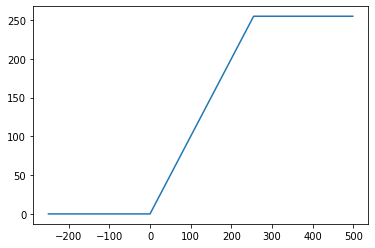

In [68]:
les_x = np.arange(-250, 500,1)
plt.plot(les_x, [maxmin(v) for v in les_x])

In [51]:
def maxminmat(matrice):
    taille=matrice.shape
    res=np.zeros_like(matrice)
    if len(taille)==3:
        for i in range(taille[0]):
            for j in range(taille[1]):
                for k in range(taille[2]):
                    res[i,j,k]=maxmin(matrice[i,j,k])
    else:
        for i in range(taille[0]):
            for j in range(taille[1]):
                res[i,j]=maxmin(matrice[i,j])
    return res

def maxminmatV2(matrice):
    hauteur, largeur = matrice.shape[:2]
    if len(matrice.shape) == 2:        
        return np.array([[maxmin(matrice[i,j])   for j in range(largeur)] for i in range(hauteur)])
    elif len(matrice.shape) == 3:
        return np.array([[[maxmin(matrice[i,j,k]) for k in range(matrice.shape[2])]  for j in range(largeur)] for i in range(hauteur)])

In [83]:
mtest = np.random.randint(-500,500,(4,4))
mtest

array([[-475, -219, -274, -459],
       [-231,   65,  419,  183],
       [ 156,   54,  220,    2],
       [ 173,  165,  465,   27]])

In [87]:
maxminmat(mtest)

array([[  0,   0,   0,   0],
       [  0,  65, 255, 183],
       [156,  54, 220,   2],
       [173, 165, 255,  27]])

In [88]:
maxminmatV2(mtest)

array([[  0,   0,   0,   0],
       [  0,  65, 255, 183],
       [156,  54, 220,   2],
       [173, 165, 255,  27]])

## Exercice 5 Luminosité 1

In [50]:
def luminosite1(imsource,unite):
    im = Image.open(imsource)
    pixels = np.array(im)
    #pour ne plus calculer modulo 255 avec des entiers sur 8 bits
    pixels = pixels.astype(int)  
    #seuillage
    pixels_res = maxminmat(pixels+unite)
    #on revient dans la plage modulo 255 avec des entiers sur 8 bits
    pixels_res = pixels_res.astype(np.uint8)
    img_res = Image.fromarray(pixels_res)
    img_res.save("lum1_"+imsource)
    img_res.show()    

In [18]:
luminosite1('valleluna.jpg', 50)

* Image `valleluna.jpg` éclaircie de 50 pixels :

!['lum1_valleluna.jpg'](lum1_valleluna.jpg)
    

## Exercice 6 _Luminosité, contraste_

In [49]:
# Liste des fonctions

def filtre_puissance(x,p):
    return int(255*(x/255)**p)
    
def f(x):
    return 3*x**2-2*x**3
    
def g(x):
    return (x**3)*(6*x**2 -15*x + 10)

def filtre_f(x, p):
    return int(255*f(x/255))

def filtre_g(x, p):
    return int(255*g(x/255))

# Fonction lum_contraste

def lum_contraste(imsource,fonction,parametre):
    im=Image.open(imsource)
    pixels = np.array(im)
    hauteur, largeur = pixels.shape[:2]
    pixels_res = np.zeros_like(pixels)
    if len(pixels.shape) == 3:
        for i in range(hauteur):
            for j in range(largeur):
                for k in range(3):
                    pixels_res[i,j,k] = maxmin(fonction(pixels[i,j,k],parametre))
    else:
        for i in range(hauteur):
            for j in range(largeur):
                pixels_res[i,j] = maxmin(fonction(pixels[i,j],parametre))
    img_res = Image.fromarray(pixels_res)
    img_res.save("lum_cont" + fonction.__name__ + imsource)
    img_res.show() 
    
def lum_contraste2(imsource,fonction):
    im=Image.open(imsource)
    pixels = np.array(im)
    hauteur, largeur = pixels.shape[:2]
    if len(pixels.shape) == 3:
        for i in range(hauteur):
            for j in range(largeur):
                for k in range(3):
                    pixels[i,j,k] = maxmin(fonction(pixels[i,j,k]))
    else:
        for i in range(hauteur):
            for j in range(largeur):
                pixels[i,j] = maxmin(fonction(pixels[i,j]))
    img_res = Image.fromarray(pixels)
    img_res.save("lum_cont" + fonction.__name__ + imsource)
    img_res.show() 

In [118]:
lum_contraste('valleluna.jpg', filtre_f, 12)

In [119]:
lum_contraste('valleluna.jpg', filtre_g, 12)

In [120]:
lum_contraste('valleluna.jpg', filtre_puissance, 2)

In [121]:
lum_contraste('valleluna.jpg', filtre_puissance, 0.5)

In [26]:
lum_contraste2('valleluna.jpg', lambda x : int(255*f(x/255)))

In [21]:
lum_contraste2('valleluna.jpg', lambda x : int(255*g(x/255)))

In [22]:
lum_contraste2('valleluna.jpg', lambda x : int(255*(x/255)**2))

In [23]:
lum_contraste2('valleluna.jpg', lambda x : int(255*(x/255)**0.5))

* Image obtenue avec la fonction de filtre `f` (accentuation de contraste) :
    
!['lum_contfiltre_fvalleluna.jpg'](lum_contfiltre_fvalleluna.jpg)

* Image obtenue avec la fonction de filtre `g` (accentuation de contraste):
    
!['lum_contfiltre_gvalleluna.jpg'](lum_contfiltre_gvalleluna.jpg)

* Image obtenue avec la fonction de filtre $x \mapsto x^2$ (assombrissement) :
    
!['lum_contfiltre_puissance2valleluna.jpg'](lum_contfiltre_puissance2valleluna.jpg)

* Image obtenue avec la fonction de filtre $x \mapsto \sqrt{x}$ (éclaircissement) :
    
!['lum_contfiltre_puissancevalleluna.jpg'](lum_contfiltre_puissancevalleluna.jpg)


## Exercice 7 _Moyenne par blocs_

In [59]:
# Matrices filtre

def flou(k):
    return np.ones((2*k+1,2*k+1),dtype="uint8")

flou_bis = np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]])
                 
A = np.array([[-1, -2, -1],
                    [-2, 16, -2],
                    [-1, -2, -1]])
     
B = np.array([[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]])
     
accentue = np.array([[-1,1,-1,1,-1],
     [1,-1, -2, -1,1],
     [-1,-2, 16, -2,-1],
     [1,-1, -2, -1,1],
     [-1,1,-1,1,-1]])

# Filtre de repoussage (emboss)
C = np.array([[2, 1, 0],
     [1, 1, -1],
     [0, -1, -2]])
     
D = np.array([[-2, -1, 0],
     [-1, 1, 1],
     [0, 1, 2]])

# Détection de bords
E = np.array([[-1/9, -1/9, -1/9],
     [-1/9, 8/9, -1/9],
     [-1/9, -1/9, -1/9]])
     
F = np.array([[0, -1, 0],
     [-1, 4, -1],
     [0, -1, 0]])
    
G = np.array([[1, 0, -1],
     [1, 0, -1],
     [1, 0, -1]])
     
H = np.array([[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]])


In [54]:
def  moyenne_bloc(pixels, i, j, matrice):
    """Fait la convolution de la matrice pixels par la matrice passée en paramètre"""
    rayonbloc = len(matrice) // 2  #matrice carrée avec des dimensions impaires
    somme_coef = np.sum(matrice)
    if somme_coef == 0:
        somme_coef = 1
    hauteur, largeur = pixels.shape[:2]
    #si pixels est une matrice de pixels en niveau de gris
    if len(pixels.shape) == 2:
        return maxmin(np.sum(pixels[i - rayonbloc : i + rayonbloc + 1, j - rayonbloc : j + rayonbloc + 1] * matrice) / somme_coef)
    else: #si pixels est une matrice de pixels couleurs en (R,G,B)
        return [maxmin(np.sum(pixels[i - rayonbloc : i + rayonbloc + 1, j - rayonbloc : j + rayonbloc + 1, k] * matrice) / somme_coef) \
                for k in range(3)]
    return pixels_res    


def moyenne_bloc2(pixels, i, j, matrice):
    rayonbloc = len(matrice)//2
    if np.sum(matrice)==0:
        som_matrice=1
    else:
        som_matrice=np.sum(matrice)
    if len(pixels.shape)==3:
        pixel=[0,0,0]
        for k in range(3):
            pixel[k]=maxmin(np.sum(pixels[i-rayonbloc:i+rayonbloc+1, j-rayonbloc:j+rayonbloc+1,k]*matrice)//som_matrice)
    else :
        pixel=maxmin(np.sum(pixels[i-rayonbloc:i+rayonbloc+1, j-rayonbloc:j+rayonbloc+1]*matrice)//som_matrice)
    return pixel
    

def applique_filtre(imsource, matrice, filtre ="filtre"):
    im = Image.open(imsource)
    pixels = np.array(im)
    hauteur, largeur = pixels.shape[:2]
    pixels_res = np.zeros_like(pixels)
    rayonbloc = len(matrice)//2
    for i in range(rayonbloc,hauteur-rayonbloc):
        for j in range(rayonbloc,largeur-rayonbloc):
            pixels_res[i,j] = moyenne_bloc(pixels,i,j,matrice)
    img_res = Image.fromarray(pixels_res)
    img_res.save(filtre + imsource)
    img_res.show()   

In [55]:
flou_bis = np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]])

In [56]:
applique_filtre('valleluna.jpg', flou_bis, filtre = "flou_")

In [60]:
A

array([[-1, -2, -1],
       [-2, 16, -2],
       [-1, -2, -1]])

In [61]:
applique_filtre('valleluna.jpg', A, filtre = "filtre_net_")

* Application du filtre de floutage gaussien $M = \begin{pmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{pmatrix}$

!['floutage_valleluna.jpg'](flou_valleluna.jpg)

* Application du filtre de convolution de la matrice $A=\begin{pmatrix}
0&0&0\\0&20&0\\0&0&0
\end{pmatrix}-M=\begin{pmatrix}
-1&-2&-1\\-2&16&-2\\-1&-2&-1
\end{pmatrix}$ (Augmentation du contraste)

!['filtrevalleluna.jpg'](filtre_net_valleluna.jpg)

## Exercice 8 _Pixellisation_ 

In [26]:
def  pixellisation(imsource, taillebloc):
    im = Image.open(imsource)
    pixels = np.array(im)
    hauteur, largeur = pixels.shape[:2]
    pixels_res = np.zeros_like(pixels)
    for i in range(0, hauteur - taillebloc + 1, taillebloc):
        for j in range(0, largeur - taillebloc + 1, taillebloc):
            pixel_moyen = [0, 0, 0]
            for k in range(3):
                pixel_moyen[k] = int(np.mean(pixels[i : i + taillebloc, j : j + taillebloc,k]))
            #pixels_res[i : i + taille_bloc, j : j + taille_bloc] =  np.array([[pixel_moyen for _ in range(taille_bloc)]for _ in range(taille_bloc)])
            for x in range(taillebloc):
                for y in range(taillebloc):
                    pixels_res[i + x, j + y] = pixel_moyen
    img_res = Image.fromarray(pixels_res)
    img_res.save("pixel_"+imsource)
    img_res.show()   
    
    
def pixellisation2(imsource,taillebloc):
    im=Image.open(imsource)
    pixels = np.array(im)
    hauteur, largeur =pixels.shape[:2]
    pixels = pixels.astype(int)
    pixels_res = np.zeros_like(pixels)
    for i in range(0,hauteur-taillebloc+1,taillebloc):
        for j in range(0,largeur-taillebloc+1,taillebloc):
            for k in range(3):
                couleur = np.mean(pixels[i:i+taillebloc,j:j+taillebloc,k])
                for x in range(taillebloc):
                    for y in range(taillebloc):
                        pixels_res[i+x,j+y,k] = couleur
    pixels_res=pixels_res.astype(np.uint8)
    img_res = Image.fromarray(pixels_res)
    img_res.save("pixel_" + str(taillebloc) + "_" + imsource)
    img_res.show()

In [44]:
pixellisation('valleluna.jpg', 10)

In [24]:
pixellisation2('valleluna.jpg', 10)

* Image pixellisée avec des blocs de  $10$ pixels de côté :
    
!['pixel_valleluna.jpg'](pixel_valleluna.jpg)

## Exercice 9 : seuillage

In [91]:
def seuillage(imsource, s):
    im = Image.open(imsource)
    pixels = np.array(im)
    assert len(pixels.shape) == 2, "l'image doit être en niveau de gris"
    hauteur, largeur = pixels.shape[:2]
    pixels_res = np.zeros_like(pixels)
    for i in range(0, hauteur):
        for j in range(0, largeur):
            if pixels[i, j] <= s:
                pixels_res[i,j] = 0
            else:
                pixels_res[i, j] = pixels[i, j]
    img_res = Image.fromarray(pixels_res)
    img_res.save("seuil_" + str(s) + "_" + imsource)
    img_res.show()    

In [92]:
seuillage('grisvalleluna.jpg', 70)

* image initiale :

!['grisvalleluna.jpg'](grisvalleluna.jpg)

* seuillage avec un seuil de $70$ :
    
!['seuil_70_grisvalleluna.jpg'](seuil_70_grisvalleluna.jpg)

## Exercice 10 : détection de contours

In [94]:
def contour(imsource, s):
    im = Image.open(imsource)
    pixels = np.array(im)
    pixels = pixels.astype(float)
    assert len(pixels.shape) == 2, "l'image doit être en niveau de gris"
    hauteur, largeur = pixels.shape[:2]
    pixels_res = np.zeros([hauteur,largeur], dtype="uint8")
    for i in range(1, hauteur - 1):
        for j in range(1, largeur - 1):            
            a = pixels[i, j - 1]
            b = pixels[i, j + 1]
            c = pixels[i - 1, j]
            d = pixels[i + 1, j]
            if np.sqrt((a - b) ** 2 + (c - d) ** 2) <= s:
                pixels_res[i, j] = 255
            else:
                pixels_res[i,j] = 0               
    img_res = Image.fromarray(pixels_res)
    img_res.save("contour_" + str(s) + "_" + imsource)
    img_res.show()    

In [97]:
contour('grisvalleluna.jpg', 20)

* image initiale :

!['grisvalleluna.jpg'](grisvalleluna.jpg)

* contour avec un seuil de  5 pixels :
    
!['contour_5_grisvalleluna.jpg'](contour_5_grisvalleluna.jpg)

* contour avec un seuil de 10 pixels :
    
!['contour_10_grisvalleluna.jpg'](contour_10_grisvalleluna.jpg)

* contour avec un seuil de  20 pixels :
    
!['contour_20_grisvalleluna.jpg'](contour_20_grisvalleluna.jpg)

## Exercice 11 _Quart de tour direct_

In [110]:
def quart_tour(fichier):
    im=Image.open(fichier)
    pixels = np.array(im)   
    assert len(pixels.shape) == 2 or len(pixels.shape) == 3, "format d'image non conforme"
    hauteur, largeur = pixels.shape[:2]
    if len(pixels.shape) == 3:
        pixels_res = np.zeros([largeur, hauteur, 3], dtype="uint8")
    else:
        pixels_res = np.zeros([largeur, hauteur], dtype="uint8")
    for i in range(largeur):
        for j in range(hauteur):
            pixels_res[i, j] = pixels[j, largeur - 1 - i]
    img_res = Image.fromarray(pixels_res)
    img_res.save("quart_tour_" + fichier)
    img_res.show()

In [108]:
quart_tour('valleluna.jpg')

* L'image initiale :

!['valleluna.jpg'](valleluna.jpg)

* L'image obtenue par quart de tour direct :

!['quart_tour_valleluna.jpg'](quart_tour_valleluna.jpg)

## Exercice 12 _Réduction / Agrandissement_

In [113]:
def reduction(imsource, coef):
    im = Image.open(imsource)
    pixels = np.array(im)   
    assert len(pixels.shape) == 2 or len(pixels.shape) == 3, "format d'image non conforme"
    hauteur, largeur = pixels.shape[:2]
    hauteur_res, largeur_res = hauteur // coef, largeur // coef
    pixels_res = np.zeros([hauteur_res, largeur_res, 3], dtype="uint8")    
    for i in range(hauteur_res):
        for j in range(largeur_res):
            pixels_res[i, j] = pixels[i * coef, j * coef]
    img_res = Image.fromarray(pixels_res)
    img_res.save("reduction_" + str(coef) + "_" + imsource)
    img_res.show()

In [114]:
reduction("valleluna.jpg", 2)

* L'image initiale :

!['valleluna.jpg'](valleluna.jpg)

* L'image obtenue par réduction de coefficient 2 :

!['reduction_2_valleluna.jpg'](reduction_2_valleluna.jpg)

In [121]:
def agrandissement(imsource, coef):
    im = Image.open(imsource)
    pixels = np.array(im)   
    assert len(pixels.shape) == 2 or len(pixels.shape) == 3, "format d'image non conforme"
    hauteur, largeur = pixels.shape[:2]
    hauteur_res, largeur_res = hauteur * coef, largeur * coef
    pixels_res = np.zeros([hauteur_res, largeur_res, 3], dtype="uint8")    
    for i in range(hauteur_res):
        for j in range(largeur_res):
            pixels_res[i, j] = pixels[i // coef, j // coef]
    img_res = Image.fromarray(pixels_res)
    img_res.save("agrandissement_" + str(coef) + "_" + imsource)
    img_res.show()

In [122]:
agrandissement("valleluna.jpg", 2)

In [123]:
reduction("valleluna.jpg", 2)
agrandissement("reduction_2_valleluna.jpg", 4)

* L'image initiale :

!['valleluna.jpg'](valleluna.jpg)

* L'image obtenue par agrandissement de coefficient 2 :

!['agrandissement_2_valleluna.jpg'](agrandissement_2_valleluna.jpg)

* L'image obtenue par réduction de coefficient 2 puis agrandissement de coefficient 4   :

!['agrandissement_4_reduction_2_valleluna.jpg'](agrandissement_4_reduction_2_valleluna.jpg)

## Exercice 13 _Stéganographie_

In [144]:
def extraction_image(imsource):
    """Extrait une image cachée dans imsource :  les 4 bits de poids forts
    de l'image cachée sont les 4 bits de poids faibles dans imsource"""
    im = Image.open(imsource)
    pixels = np.array(im)   
    assert len(pixels.shape) == 2 , "Il faut une image en niveau de gris"
    pixels_res = np.zeros_like(pixels) 
    hauteur, largeur = pixels.shape[:2]
    for i in range(hauteur):
        for j in range(largeur):
            pixels_res[i, j] = (pixels[i, j ] % 16) * 16
    img_res = Image.fromarray(pixels_res)
    img_res.save("image_cache_"  + imsource)
    img_res.show()

In [127]:
extraction_image("mystere.png")

* L'image source :

!['mystere.png'](mystere.png)

* L'image qui était cachée dans l'image source :

!['image_cache__mystere.png'](image_cache_mystere.png)

In [131]:
def cache_image(imcache, imsecret):
    """Cache imsecret dans imcache  :  les 4 bits de poids forts de imsecret
    remplacent les 4 bits de poids faibles de  imcache"""
    im1 = Image.open(imcache)
    im2 = Image.open(imsecret)
    pixels1 = np.array(im1)
    pixels2 = np.array(im2) 
    assert len(pixels1.shape) == 2 and  pixels1.shape == pixels2.shape, "Il faut deux images en niveau de gris de même dimension"
    hauteur, largeur = pixels1.shape[:2]
    pixels_res = np.zeros_like(pixels1)
    for i in range(hauteur):
        for j in range(largeur):
            pixels_res[i, j] = (pixels1[i, j] // 16) * 16 + pixels2[i, j] // 16
    img_res = Image.fromarray(pixels_res)
    img_res.save("image_" + imsecret.split('.')[0] + "_dans_" +  imcache.split('.')[0] + ".png")
    img_res.show()

In [136]:
gris('cypres.bmp',[30, 59, 11])

In [137]:
gris('femme.bmp',[30, 59, 11])

In [138]:
cache_image('griscypres.bmp', 'grisfemme.bmp')

In [140]:
extraction_image_("image_grisfemme_dans_griscypres.png")

* Image cachette avant stéganographie : 
    
!['griscypres.bmp'](griscypres.bmp)

* Image secret / cachée avant stéganographie :  
    
!['grisfemme.bmp'](grisfemme.bmp)

* Image cachette avec stéganographie :
    
!['image_grisfemme_dans_griscypres.png'](image_grisfemme_dans_griscypres.png)

* Image secret / cachée extraite après stéganographie :  

!['image_cache_image_grisfemme_dans_griscypres.png'](image_cache_image_grisfemme_dans_griscypres.png)

In [145]:
def extraction_image_couleur(imsource):
    """Extrait une image cachée dans imsource :  les 4 bits de poids forts
    de l'image cachée sont les 4 bits de poids faibles dans imsource"""
    im = Image.open(imsource)
    pixels = np.array(im)   
    assert len(pixels.shape) == 3, "Il faut une image en R,G,B)"
    pixels_res = np.zeros_like(pixels) 
    hauteur, largeur = pixels.shape[:2]
    for i in range(hauteur):
        for j in range(largeur):
            for k in range(3):
                pixels_res[i, j, k] = (pixels[i, j, k] % 16) * 16
    img_res = Image.fromarray(pixels_res)
    img_res.save("image_cache_"  + imsource)
    img_res.show()

def cache_image_couleur(imcache, imsecret):
    """Cache imsecret dans imcache  :  les 4 bits de poids forts de imsecret
    remplacent les 4 bits de poids faibles de  imcache"""
    im1 = Image.open(imcache)
    im2 = Image.open(imsecret)
    pixels1 = np.array(im1)
    pixels2 = np.array(im2) 
    assert len(pixels1.shape) == 3 and  pixels1.shape == pixels2.shape, "Il faut deux images en (R,G,B) de même dimension"
    hauteur, largeur = pixels1.shape[:2]
    pixels_res = np.zeros_like(pixels1)
    for i in range(hauteur):
        for j in range(largeur):
            for k in range(3):
                pixels_res[i, j, k] = (pixels1[i, j, k] // 16) * 16 + pixels2[i, j, k] // 16
    img_res = Image.fromarray(pixels_res)
    img_res.save("image_" + imsecret.split('.')[0] + "_dans_" +  imcache.split('.')[0] + ".png")
    img_res.show()

In [143]:
cache_image_couleur('cypres.bmp', 'femme.bmp')

In [147]:
extraction_image_couleur("image_femme_dans_cypres.png")

* Image cachette avant stéganographie : 
    
!['cypres.bmp'](cypres.bmp)

* Image secret / cachée avant stéganographie :  
    
!['femme.bmp'](femme.bmp)

* Image cachette avec stéganographie :
    
!['image_femme_dans_cypres.png'](image_femme_dans_cypres.png)

* Image secret / cachée extraite après stéganographie :  

!['image_cache_image_femme_dans_cypres.png'](image_cache_image_femme_dans_cypres.png)